In [1]:
import numpy as np
import pandas as pd

#データ読み込み
# months : 使用月数
# falls : 1ヶ月で落下させた回数
# sex : 性別 男=1,女性=2
# age : 年代
# past_falls : 過去の故障歴有無
# width : 機種サイズ幅
# height : 機種サイズ高さ
# thick : 機種サイズ厚み
# cover : カバー有無
# ring : リング有無

df = pd.read_csv("./data/SVM.csv", index_col=0)
len(df)

39

In [2]:
#目的変数=スマホが壊れたかどうかに設定し、故障に関係ありそうな変数を選んでモデルを作成
x = df.drop(["past_falls","sex","age","ring"], axis=1).values

#目的変数
y = df["past_falls"].values

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#学習データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#データの標準化処理
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [4]:
#PCAを使用して、次元を削除
#多次元データを二次元データに減らしていく

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_train_std2 = pca.fit_transform(x_train_std)
x_test_std2 = pca.fit_transform(x_test_std)

In [5]:
x_train_std.shape

(27, 7)

In [6]:
x_train_std2.shape

(27, 2)

In [7]:
#モデルの構築
from sklearn.svm import SVC

#モデルの構築 (線型SVM, RBFカーネル)
model1 = SVC(kernel="linear")
model2 = SVC(kernel="rbf")

model1.fit(x_train_std2, y_train)
model2.fit(x_train_std2, y_train)

SVC()

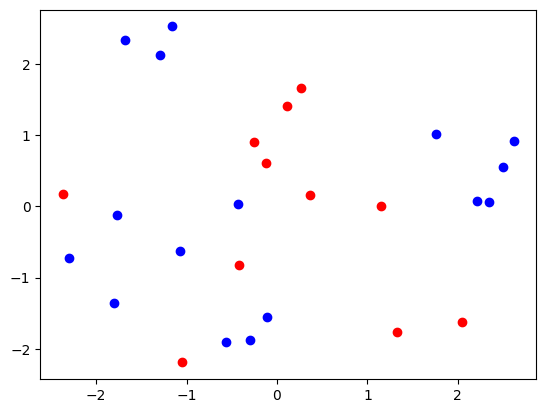

In [8]:
# 学習データのモデルを用いて分類結果を図示
from matplotlib import pyplot

pyplot.plot(x_train_std2[y_train == 1,0], x_train_std2[y_train == 1,1], "ro")
pyplot.plot(x_train_std2[y_train == 0,0], x_train_std2[y_train == 0,1], "bo")
pyplot.show()

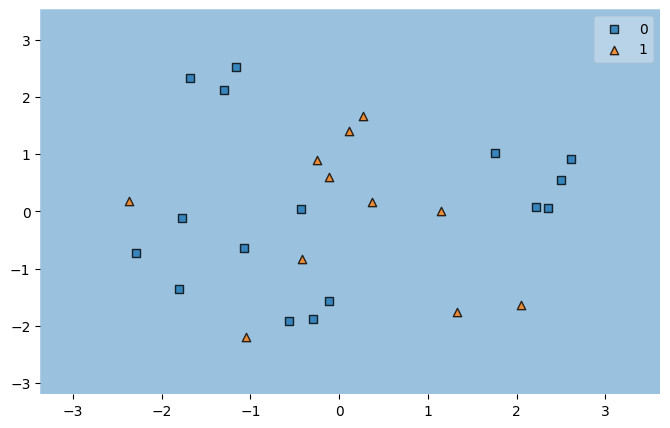

In [9]:
# 分類結果を図示
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(x_train_std2, y_train, clf=model1)
plt.show()

# 結果を見ると、線型で上手く表すことは難しい事が分かった

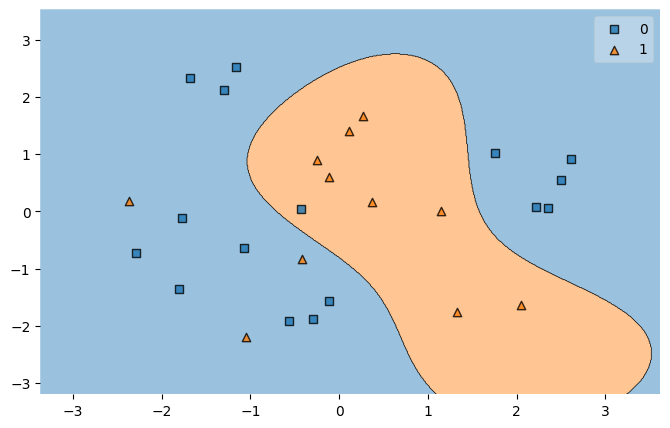

In [10]:
# 分類結果を図示2
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(x_train_std2, y_train, clf=model2)
plt.show()

# 結果を見ると、RBFカーネルでは上手く分けられているように見える